# **House price estimation**

Importing libraries and setting up frame size

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (10,6)

from useful import * 

Importing data

In [2]:
data1 = pd.read_csv('Houses.csv', encoding = 'ansi')
data1.head()

,no,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zabłocie Stanisława Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Południe Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,3,Grunwald,Poznań,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0


## **Cleaning data**

In [3]:

data1.rename(columns = {'Unnamed: 0':'no','latitude':'lat','longitude':'lon'}, inplace = True)
#Dropping columns address, latitude, longitude as those are insignificant 
data1.drop(['address','lat','lon'], axis='columns', inplace = True)

display(data1.head())


,no,city,floor,id,price,rooms,sq,year
0,0,Kraków,2.0,23918.0,749000.0,3.0,74.05,2021.0
1,1,Warszawa,3.0,17828.0,240548.0,1.0,24.38,2021.0
2,2,Kraków,2.0,22784.0,427000.0,2.0,37.00,1970.0
3,3,Poznań,2.0,4315.0,1290000.0,5.0,166.00,1935.0
4,4,Warszawa,1.0,11770.0,996000.0,5.0,105.00,2020.0


Checking if there are blank spaces

In [4]:
print(data1.isnull().sum())

no       0
city     0
floor    0
id       0
price    0
rooms    0
sq       0
year     0
dtype: int64


In [5]:
for head in data1.keys():
    print(data1[head].unique())

[    0     1     2 ... 23761 23762 23763]
['Kraków' 'Warszawa' 'Poznań']
[ 2.  3.  1.  0. 10.  8.  4.  6.  5.  9.  7.]
[23918. 17828. 22784. ...  4952. 24148. 10889.]
[749000. 240548. 427000. ... 613197. 408296. 294021.]
[ 3.  1.  2.  5.  4.  6.  8.  7. 10.  9.]
[74.05 24.38 37.   ... 75.05 55.74 46.29]
[2021. 1970. 1935. 2020. 2022. 2003. 1982. 1999. 1968. 1989. 2019. 2005.
 1930. 2008. 1960. 2013. 1936. 1890. 2010. 1972. 2016. 2009. 1990. 2018.
 2000. 1974. 1976. 2017. 1980. 1938. 1926. 1963. 2015. 2012. 1971. 1949.
 1977. 1920. 2014. 2007. 2001. 1911. 1973. 2006. 1975. 1978. 1987. 1984.
 2023. 1904. 2004. 1956. 1900. 1966. 1950. 1931. 1912. 1951. 1955. 1983.
 1964. 1905. 1962. 2011. 1939. 1965. 1967. 2002. 1952. 1927. 1991. 1985.
 1953. 1969. 1979. 1910. 1988. 1954. 1997. 1998. 1886. 1992. 1996. 1959.
 1880. 1981. 1916. 1986. 1918. 1879. 1946. 1901. 1780. 1995. 1908. 1937.
   75. 1994. 1864. 1919. 1923. 1958. 1993. 1915. 1948. 1907. 1957. 1961.
 1902. 1924. 1885. 1934. 1947. 1925. 1

Checking if values in each row seem real

In [6]:
data1.sort_values(by = 'year', ascending = True).head(15)

,no,city,floor,id,price,rooms,sq,year
7659,7659,Poznań,2.0,1603.0,235000.0,2.0,40.50,70.0
1032,1032,Warszawa,1.0,14485.0,760000.0,3.0,53.00,75.0
4513,4513,Warszawa,10.0,13832.0,320000.0,1.0,28.00,80.0
14431,14431,Poznań,1.0,640.0,375000.0,3.0,64.00,80.0
10408,10408,Warszawa,9.0,8116.0,450000.0,2.0,47.80,81.0
8972,8972,Poznań,1.0,56.0,329000.0,2.0,27.80,195.0
19206,19206,Kraków,0.0,27281.0,655000.0,3.0,73.22,200.0
6458,6458,Kraków,2.0,21883.0,410000.0,2.0,48.00,202.0
22999,22999,Warszawa,2.0,11359.0,660000.0,3.0,59.00,214.0
13273,13273,Warszawa,2.0,15582.0,350000.0,1.0,21.00,1070.0


Houses build before 1390 seem to be data errors, especially in cities like Warsaw (Warszawa), first five rows contain years less than 100 which is not possible, assuming that it is a data error. Years higher than 2022 also will be counted as data errors and replaced.

Replacing those wrong years with mean of column 'year'

In [7]:
data1.loc[(data1['year']) < 1370, 'year'] = data1.loc[(data1['year']) >= 1370, 'year'].mean()
data1.loc[(data1['year']) > 2022, 'year'] = data1.loc[(data1['year']) < 2022, 'year'].mean()

In [8]:
data2 = data1.copy()

In [9]:
#price per square meter
data2['price_per_m2'] = data2['price'] / data2['sq']

In [10]:
data2.sort_values(by = 'price_per_m2', ascending = True).head(5)

,no,city,floor,id,price,rooms,sq,year,price_per_m2
6198,6198,Kraków,2.0,22229.0,1007185.0,5.0,1007185.0,2020.0,1.000000
10798,10798,Warszawa,1.0,12896.0,389880.0,2.0,9000.0,2022.0,43.320000
18637,18637,Poznań,1.0,1517.0,544169.0,4.0,8065.0,2021.0,67.472908
10084,10084,Warszawa,1.0,6483.0,5000.0,2.0,50.0,2009.0,100.000000
22783,22783,Poznań,1.0,3363.0,29900.0,2.0,49.0,2003.0,610.204082


House for less than 500 PLN for 1 m2 seems as a data error, they will be eliminated when a function deleting extreme values is used

In [11]:
data2['city'].value_counts()

Warszawa    9851
Kraków      9764
Poznań      4149
Name: city, dtype: int64

In [12]:
data2['price_per_m2'].describe()

count     23764.000000
mean      10760.979594
std        3861.161601
min           1.000000
25%        8400.000000
50%        9947.958273
75%       12318.157708
max      138636.363636
Name: price_per_m2, dtype: float64

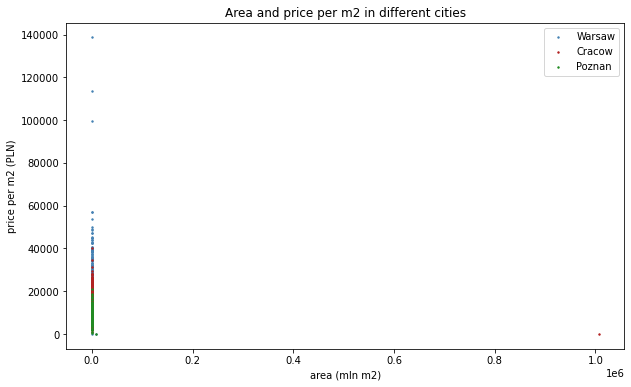

In [13]:
war = data2[(data2['city'] == 'Warszawa')]
kra = data2[(data2['city'] == 'Kraków')]
poz = data2[(data2['city'] == 'Poznań')]
plt.scatter(war.sq, war.price_per_m2, color = 'steelblue', label = 'Warsaw', s = 2)
plt.scatter(kra.sq, kra.price_per_m2, color = 'firebrick', label = 'Cracow', s = 2)
plt.scatter(poz.sq, poz.price_per_m2, color = 'forestgreen', label = 'Poznan', s = 2)
plt.xlabel('area (mln m2)')
plt.ylabel('price per m2 (PLN)')
plt.title('Area and price per m2 in different cities')
plt.legend()

Too many extreme points make this plot illegible, that's why it is necessary to cut those extreme values

**Need to use a function that will cut all values that are higher or lower than standard deviation (sd)**

## **Data visualization**

Functions 'remove_outliers' are removing all data where price per m2, price and area (sq) are higher or lower than 3 standard deviations

In [14]:
data3_2 = remove_outliers_per(data2)
data3_1 = remove_outliers_p(data3_2)
data3 = remove_outliers_s(data3_1)
data3['price_per_m2'].describe()

count    18758.000000
mean     10254.967925
std       2161.393628
min       6548.665365
25%       8600.000000
50%       9841.269841
75%      11766.996955
max      16766.815274
Name: price_per_m2, dtype: float64

After using a function around 4 thousand rows were deleted and standard deviation lowered from 3900 to 2200

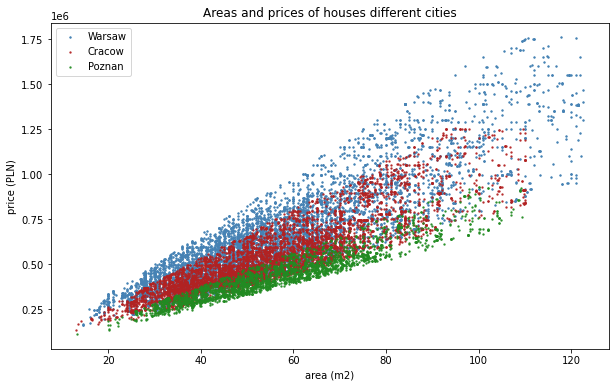

In [15]:
war1 = data3[(data3['city'] == 'Warszawa')]
kra1 = data3[(data3['city'] == 'Kraków')]
poz1 = data3[(data3['city'] == 'Poznań')]
matplotlib.rcParams['figure.figsize'] = (10,6)
plt.scatter(war1.sq, war1.price, color = 'steelblue', label = 'Warsaw', s = 2)
plt.scatter(kra1.sq, kra1.price, color = 'firebrick', label = 'Cracow', s = 2, alpha = 0.8)
plt.scatter(poz1.sq, poz1.price, color = 'forestgreen', label = 'Poznan', s = 2, alpha = 0.8)
plt.xlabel('area (m2)')
plt.ylabel('price (PLN)')
plt.title('Areas and prices of houses different cities')

plt.legend()

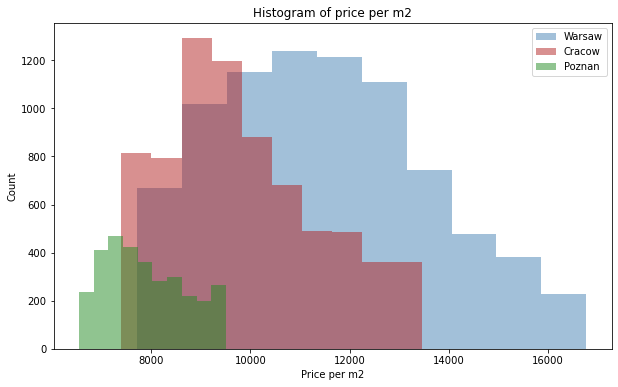

In [16]:
plt.hist(war1.price_per_m2 , rwidth = 1, alpha = 0.5, color = 'steelblue', label = 'Warsaw')
plt.hist(kra1.price_per_m2 , rwidth = 1, alpha = 0.5, color = 'firebrick', label = 'Cracow')
plt.hist(poz1.price_per_m2 , rwidth = 1, alpha = 0.5, color = 'forestgreen', label = 'Poznan')
plt.xlabel('Price per m2')
plt.ylabel('Count')
plt.title('Histogram of price per m2')
plt.legend()

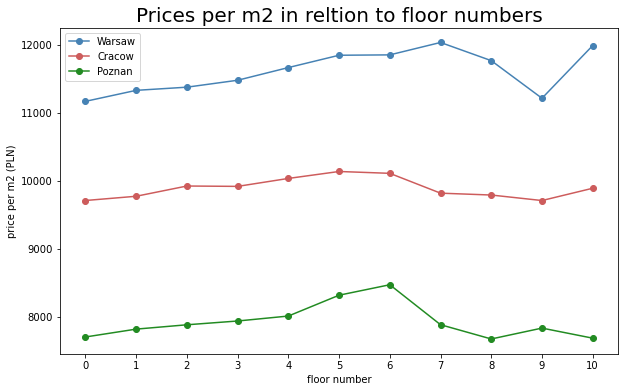

In [17]:
i = 0
mean_floor_war = []
while i <= 10:
    mean_floor_war.append(war1.loc[(war1['floor']) == i]['price_per_m2'].mean())
    i+=1
j = 0
mean_floor_kra = []
while j <= 10:
    mean_floor_kra.append(kra1.loc[(kra1['floor']) == j]['price_per_m2'].mean())
    j+=1
k = 0
mean_floor_poz = []
while k <= 10:
    mean_floor_poz.append(poz1.loc[(poz1['floor']) == k]['price_per_m2'].mean())
    k+=1

plt.plot(np.arange(11),mean_floor_war, label = 'Warsaw', color = 'steelblue', marker = 'o')
plt.plot(np.arange(11),mean_floor_kra, label = 'Cracow', color = 'indianred', marker = 'o')
plt.plot(np.arange(11),mean_floor_poz, label = 'Poznan', color = 'forestgreen', marker = 'o')
plt.xticks(np.arange(0, 11, 1.0))
plt.xlabel('floor number')
plt.ylabel('price per m2 (PLN)')
plt.title('Prices per m2 in reltion to floor numbers',fontsize = 20)
plt.legend()

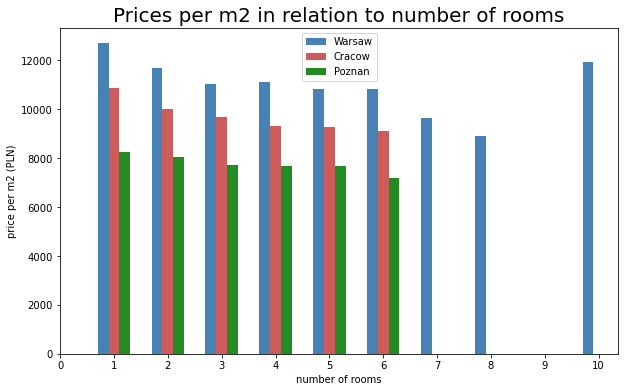

In [18]:
i = 0
mean_rooms_war = []
while i <= 10:
    mean_rooms_war.append(war1.loc[(war1['rooms']) == i]['price_per_m2'].mean())
    i+=1
j = 0
mean_rooms_kra = []
while j <= 10:
    mean_rooms_kra.append(kra1.loc[(kra1['rooms']) == j]['price_per_m2'].mean())
    j+=1
k = 0
mean_rooms_poz = []
while k <= 10:
    mean_rooms_poz.append(poz1.loc[(poz1['rooms']) == k]['price_per_m2'].mean())
    k+=1


plt.bar(np.arange(11)-0.2,mean_rooms_war,0.2, label = 'Warsaw', color = 'steelblue')
plt.bar(np.arange(11),mean_rooms_kra,0.2, label = 'Cracow', color = 'indianred')
plt.bar(np.arange(11)+0.2,mean_rooms_poz,0.2, label = 'Poznan', color = 'forestgreen')
plt.xticks(np.arange(0, 11, 1.0))
plt.xlabel('number of rooms')
plt.ylabel('price per m2 (PLN)')
plt.title('Prices per m2 in relation to number of rooms',fontsize = 20)
plt.legend()

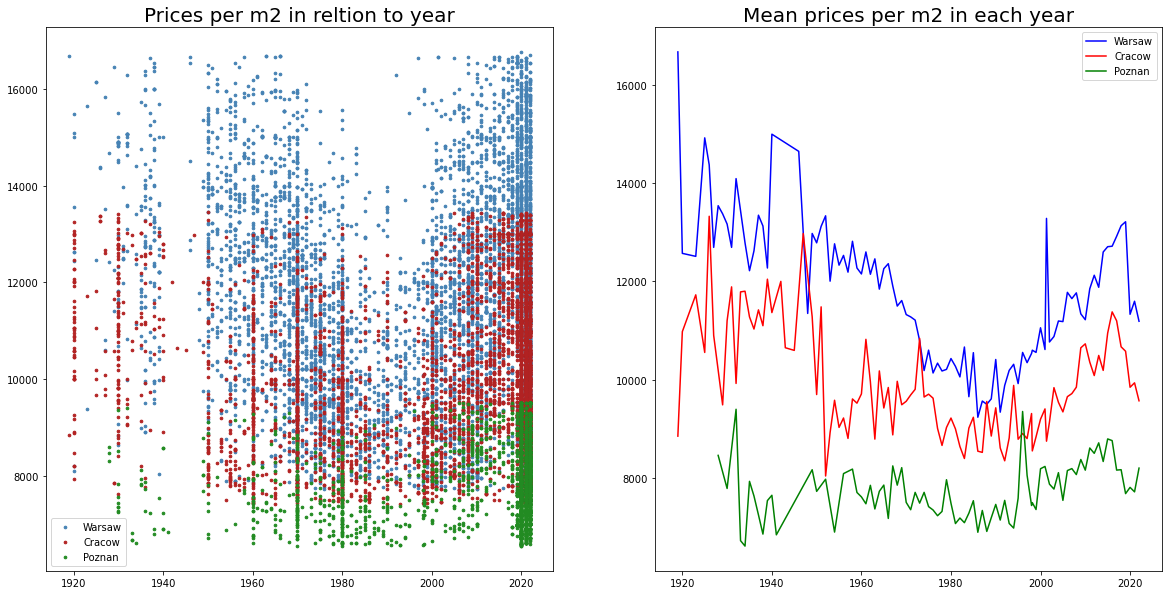

In [19]:
remove_outliers_y(data2)

war2 = remove_outliers_y(war1)
kra2 = remove_outliers_y(kra1)
poz2 = remove_outliers_y(poz1)

matplotlib.rcParams['figure.figsize'] = (20,10)
plt.subplot(1,2,1)
plt.scatter(war2['year'], war2['price_per_m2'], s=7, label = 'Warsaw', color = 'steelblue')
plt.scatter(kra2['year'], kra2['price_per_m2'], s=7, label = 'Cracow', color = 'firebrick')
plt.scatter(poz2['year'], poz2['price_per_m2'], s=7, label = 'Poznan', color = 'forestgreen')
plt.title('Prices per m2 in reltion to year', fontsize = 20)
plt.legend()

plt.subplot(1,2,2)
x1 = war2.groupby('year')['price_per_m2'].mean().to_frame()
x2 = kra2.groupby('year')['price_per_m2'].mean().to_frame()
x3 = poz2.groupby('year')['price_per_m2'].mean().to_frame()

plt.plot( war2['year'].sort_values().unique(), x1['price_per_m2'], color = 'blue', label = 'Warsaw')
plt.plot( kra2['year'].sort_values().unique(), x2['price_per_m2'], color = 'red', label = 'Cracow')
plt.plot( poz2['year'].sort_values().unique(), x3['price_per_m2'], color = 'green', label = 'Poznan')
plt.title('Mean prices per m2 in each year', fontsize = 20)
plt.legend()

<AxesSubplot:title={'center':'Pearson Correlation'}>

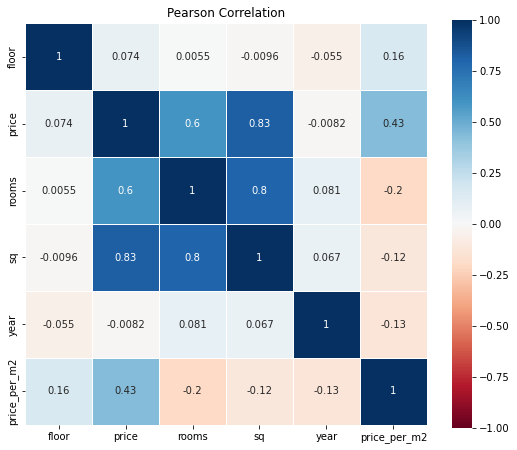

In [20]:
data5 = data3.drop(['no', 'id'], axis = 'columns')
plt.figure(figsize=(9,7.5))
plt.title('Pearson Correlation')
display(sns.heatmap(data5.corr(),linewidths=1,
            square=True, cmap='RdBu', linecolor='white', annot=True, vmin = -1))

Strong positive correlation can be seen between sq, rooms, price. In case of the others correlation is very close to 0.

## **Linear regression**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit, cross_val_score, GridSearchCV
import statsmodels.api as sm
from scipy import stats

In [22]:
#To hide red alerts about function that will be outdated in the future
import warnings
warnings.filterwarnings('ignore')

**Evaluating accuracy of linear regression model**

In [23]:
data_r = data3.drop(['no','id','price_per_m2'], axis = 'columns')
data_r
dummies = pd.get_dummies(data_r.city)
data_r2 = pd.concat([data_r, dummies], axis = 'columns')
data_r3 = data_r2.drop('city', axis = 'columns')
data_rx = data_r3.drop('price', axis = 'columns')
data_ry = data_r3.price

lr_clf = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(data_rx,data_ry, test_size = 0.2, random_state = 10)
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test, y_test)

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
print(cross_val_score(LinearRegression(), data_rx, data_ry, cv=cv))

[0.78514699 0.78216301 0.79280143 0.79128964 0.78973446]


In [24]:
x1 = sm.add_constant(data3['sq'])
x2 = np.column_stack((x1, data3['rooms'], data3['floor'], data3['year']))
est = sm.OLS(data3['price'], x2)
est2 = est.fit()

print('Where: x1 = sq; x2 = rooms; x3 = floor; x4 = year')
print(est2.summary())

Where: x1 = sq; x2 = rooms; x3 = floor; x4 = year
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                 1.114e+04
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:14:25   Log-Likelihood:            -2.4625e+05
No. Observations:               18758   AIC:                         4.925e+05
Df Residuals:                   18753   BIC:                         4.925e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

After using **Least Squares Method** on the model where price is explained by area, number of rooms, number of floor and year all factors are significant as **p value is very low** (lower than 0.000). Also **adjusted R squared is high - 0.704** which means that almost 71% of value of price is explained by the used factors. However, as condition number shows, there is a **strong collinearity** in this model, looking on Pearson Correlation Table above we can see that it is probably between 'sq' and 'rooms', so 'rooms' will be dropped from this model. **Thus, in predicting price of house all those factors (area, number of floor and year of contruction) will be used**

Checking p-values separately in each city

In [25]:
x1_p = sm.add_constant(poz1['sq'])
x2_p = np.column_stack((x1_p, poz1['floor'], poz1['year']))
est_p = sm.OLS(poz1['price'], x2_p)
est2_p = est_p.fit()

x1_w = sm.add_constant(war1['sq'])
x2_w = np.column_stack((x1_w, war1['floor'], war1['year']))
est_w = sm.OLS(war1['price'], x2_w)
est2_w = est_w.fit()

x1_k = sm.add_constant(kra1['sq'])
x2_k = np.column_stack((x1_k, kra1['floor'], kra1['year']))
est_k = sm.OLS(kra1['price'], x2_k)
est2_k = est_k.fit()

a = ['const','sq','floor','year']
b_p = est2_p.pvalues[:4].round(2)
b_w = est2_w.pvalues[:4].round(2)
b_k = est2_k.pvalues[:4].round(2)
b = est2.pvalues[:4].round(2)
pd.DataFrame({'variable':a, 'p-values all':b ,'p-values Warsaw':b_w, 'p-values Cracow':b_k, 'p-values Poznan':b_p})


,variable,p-values all,p-values Warsaw,p-values Cracow,p-values Poznan
const,const,0.0,0.0,0.0,0.0
x1,sq,0.0,0.0,0.0,0.0
x2,floor,0.0,0.0,0.0,0.0
x3,year,0.0,0.0,0.0,0.0


All p-values are much below 0.05 which marks that all variables are significant

**Function estimating houses' prices considering city, area (sq), floor and year of construction**

In [26]:
def price_prediction(city, sq, floor, year):
    loc_index = np.where(data_rx.columns==city)[0][0]
    
    x = np.zeros(len(data_rx.columns))
    x[2] = sq
    x[0] = floor
    x[3] = year
    if loc_index >= 0:
        x[loc_index] = 1
    
    return lr_clf.predict([x])[0]

Testing:

In [27]:
price_prediction('Warszawa', 55, 4, 2021)

723684.3129272385

In [28]:
price_prediction('Poznań', 23, 4, 1970)

168572.37934391428

In [29]:
price_prediction('Kraków', 34, 5, 2019)

404726.8820570061

## **Predicting program**

In [31]:
city_names = {'warsaw':'Warszawa','cracow':'Kraków','poznan':'Poznań'}
u_city = 'x'
u_sq = 0
u_floor = -1
u_year = 0

print('--------------------------------------------------------------------------')
while u_city not in ['warsaw', 'cracow', 'poznan']:
    u_city = input('Pass the city  (Cracow, Warsaw or Poznan): \t\t').lower()
while u_sq <= 0:
    u_sq = int(input('Pass the area in m^2: \t\t\t\t\t'))
while u_floor < 0:
    u_floor = int(input('Pass the floor number: \t\t\t\t\t'))
while u_year < 1000 or u_year > 2022:
    u_year = int(input('Pass the year of construction: \t\t\t\t'))
 
result = price_prediction(city_names[u_city], u_sq, u_floor, u_year).round(2)
    
if result > 0:
    print(f'''--------------------------------------------------------------------------
Estimated house price: \t\t\t\t\t {result:,} PLN
--------------------------------------------------------------------------''')
else:
    print(f'''--------------------------------------------------------------------------
Estimated house price: \t\t\t\t\t error (result < 0)
--------------------------------------------------------------------------''')
        


--------------------------------------------------------------------------
Pass the city  (Cracow, Warsaw or Poznan): 		poznan
Pass the area in m^2: 					56
Pass the floor number: 					3
Pass the year of construction: 				1976
--------------------------------------------------------------------------
Estimated house price: 					 542,615.2 PLN
--------------------------------------------------------------------------
